In [3]:
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *
import seaborn as sns

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
}

sns.set_theme(
    # context="talk",
    context="paper",
    # rc={"figure.figsize": (8, 6)},
    # palette="colorblind6",
    style="whitegrid",
    rc=tex_fonts,
)

# data = {
#     1: load_data("../stats/fpm_4_2D_x1.json"),
#     4: load_data("../stats/fpm_4_2D_x4.json"),
#     2: load_data("../stats/fpm_4_2D_x2.json"),
#     5: load_data("../stats/fpm_4_2D_x5.json"),
#     3: load_data("../stats/fpm_4_2D_x3.json"),
#     6: load_data("../stats/fpm_4_2D_x6.json"),
# }

data = {
    1: load_data("../stats/fpm_4_2D_solver_2_exact_x1.json"),
    4: load_data("../stats/fpm_4_2D_solver_2_exact_x4.json"),
    2: load_data("../stats/fpm_4_2D_solver_2_exact_x2.json"),
    5: load_data("../stats/fpm_4_2D_solver_2_exact_x5.json"),
    3: load_data("../stats/fpm_4_2D_solver_2_exact_x3.json"),
    6: load_data("../stats/fpm_4_2D_solver_2_exact_x6.json"),
}

ax_names = {
    1: "Cell size: h",
    2: "Cell size: h / 2",
    3: "Cell size: h / 3",
    4: "Cell size: h / 4",
    5: "Cell size: h / 5",
    6: "Cell size: h / 6",
}


save_path = "../figures/fpm_4_2D_"

/home/porepy/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:14: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import trange  # type: ignore


In [4]:
shape = [3, 2]
figsize = (12, 5)

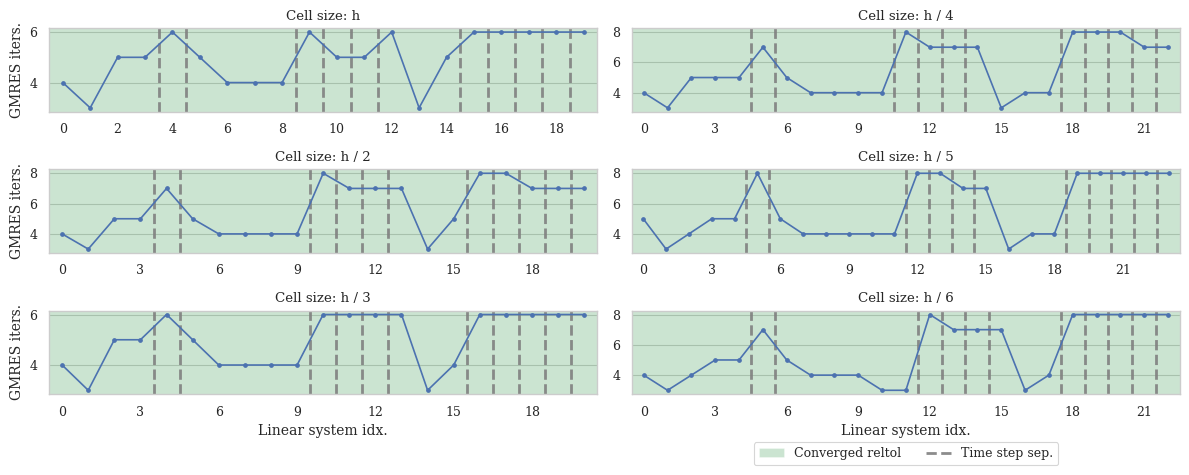

In [5]:
def render_element(entry: Sequence[TimeStepStats]):
    color_converged_reason(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which='major', axis='y')
    plt.plot(get_gmres_iterations(entry), marker=".")


plot_grid(data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=ax_names)
plt.savefig(save_path + 'gmres_iters_convergence.pdf', bbox_inches='tight')

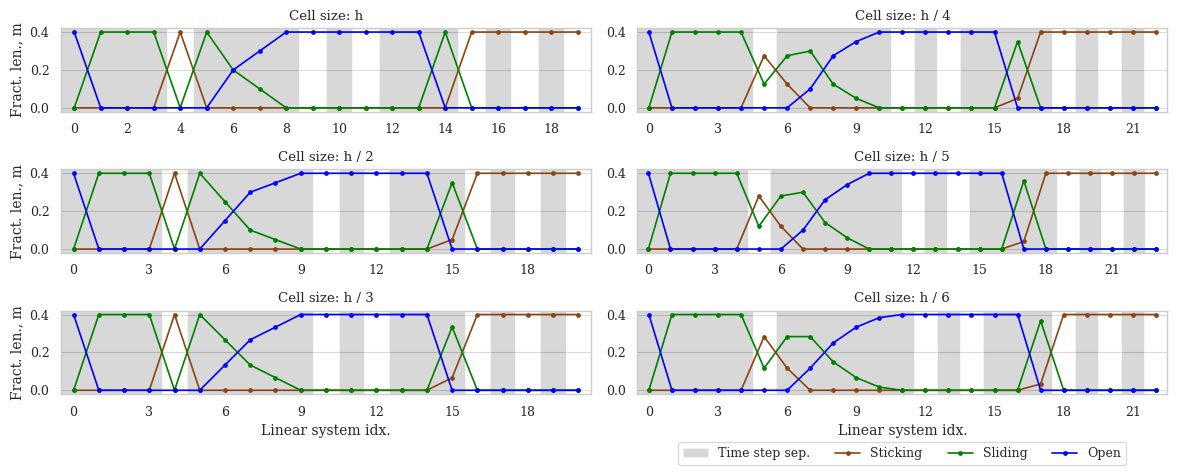

In [6]:
def render_element(i: int, entry: Sequence[TimeStepStats]):
    st, sl, op, tr = get_volume_sticking_sliding_open_transition(
        entry, dofs_info_path="../stats/dofs_info_fpm_4_2d.json", cell_size_multiplier=i
    )
    color_time_steps(entry, fill=True, grid=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which='major', axis='y')
    plt.plot(st, label="Sticking", marker=".", color=COLOR_STICKING)
    plt.plot(sl, label="Sliding", marker=".", color=COLOR_SLIDING)
    plt.plot(op, label="Open", marker=".", color=COLOR_OPEN)
    # plt.plot(tr, label="Transition", marker=".", color=COLOR_TRANSITION)


plot_grid(data, render_element, shape=shape, figsize=figsize, ylabel="Fract. len., m", ax_titles=ax_names)
# plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

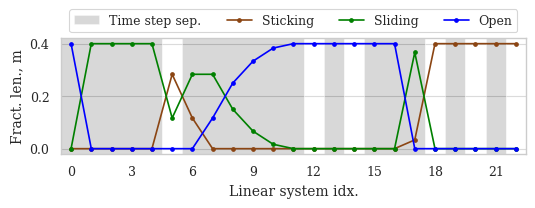

In [7]:
plt.figure(figsize=(6, 1.5))
render_element(i=6, entry=data[6])
plt.ylabel("Fract. len., m")
plt.xlabel("Linear system idx.")
plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=5,
    fancybox=True,
)
plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

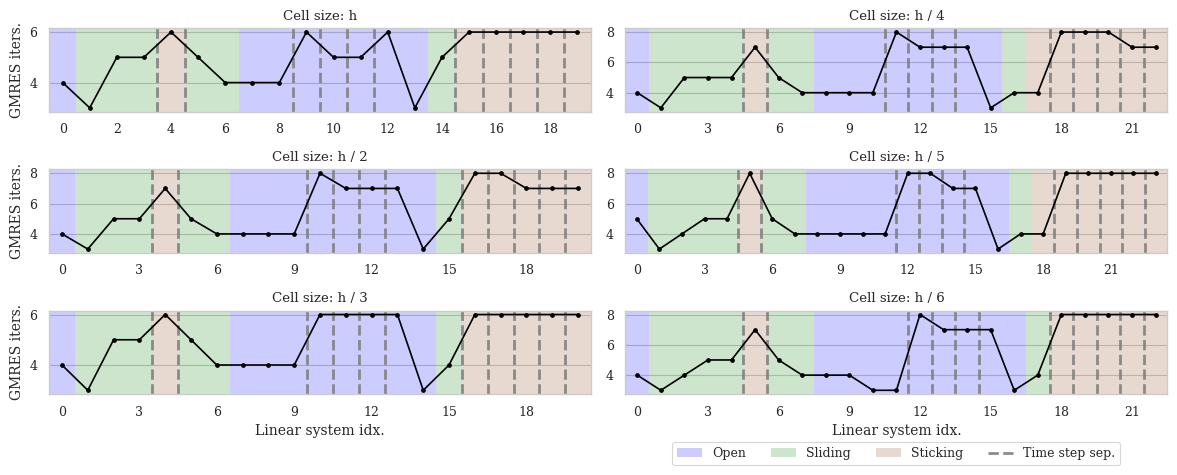

In [8]:
def render_element(entry: Sequence[TimeStepStats]):
    color_sticking_sliding_open_transition(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which='major', axis='y')
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")



axes = plot_grid(data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=ax_names)

plt.savefig(save_path + 'gmres_fracture_state_exact_inv.pdf', bbox_inches='tight')

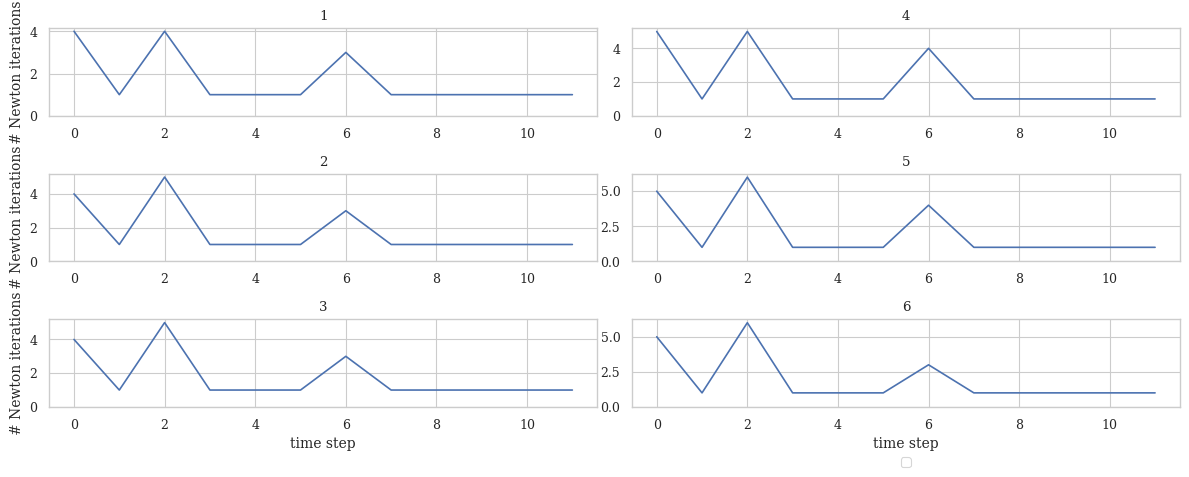

In [9]:
def render_element(entry: Sequence[TimeStepStats]):
    plt.plot(get_newton_iterations(entry))
    plt.ylim(bottom=0)
    plt.grid(visible=True)


plot_grid(
    data,
    render_element,
    shape=shape,
    figsize=figsize,
    ylabel="# Newton iterations",
    xlabel="time step",
)

Text(0.5, 0, 'Simulation time, s')

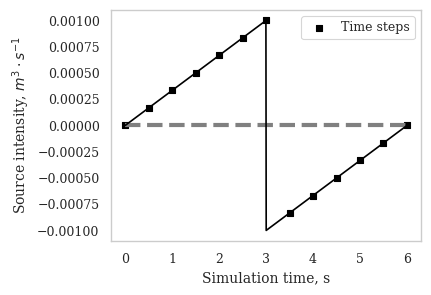

In [10]:
from fpm_4_2D import make_model

model = make_model(cell_size_multiplier=1)
model.prepare_simulation()
source = []
t_list = np.linspace(0, 6, 13, endpoint=True)
for t in t_list:
    source.append(model.get_source_intensity(t))

source_fine = []
t_list_fine = np.linspace(0, 6, 1000, endpoint=True)
for t in t_list_fine:
    source_fine.append(model.get_source_intensity(t))

plt.figure(figsize=(4, 3))
plt.plot([0, 6], [0, 0], color='grey', linestyle='--', linewidth=3)
plt.plot(t_list_fine, source_fine, color="black")
plt.scatter(t_list, source, marker="s", label="Time steps", color="black")
plt.grid()
plt.legend()    
plt.ylabel(r"Source intensity, $m^3 \cdot s^{-1}$")
plt.xlabel("Simulation time, s")

# Testing bad matrix

In [11]:
assert False

AssertionError: 

In [ ]:
from fpm_4_2D import make_model
from mat_utils import *
from fixed_stress import *

cell_size_multiplier=2
model = make_model(cell_size_multiplier=cell_size_multiplier)
model.prepare_simulation()
model.before_nonlinear_loop()
model.before_nonlinear_iteration()
model._initialize_solver()



num sticking: 0
num sliding: 0
num open: 0
num transition: 8


In [ ]:
mat_idx = 11
entry = data[cell_size_multiplier]
print(get_gmres_iterations(entry)[mat_idx])
mat, rhs, state, iterate, dt = load_matrix_rhs_state_iterate_dt(entry, mat_idx)

28


In [ ]:
model.linear_system = mat, rhs
model.equation_system.set_variable_values(iterate, iterate_index=0)
model.equation_system.set_variable_values(state, time_step_index=0)  # 1

model.ad_time_step.set_value(dt)
st, sl, op, tr = model.sticking_sliding_open_transition()
print(sum(st))
print(sum(sl))
print(sum(op))
print(sum(tr))

0
0
8
0


Solve  took: 0.04
True residual permuted: 1.6777213237983017e-07
True residual: 1.6772893763778411e-07
PETSc Converged Reason: 2


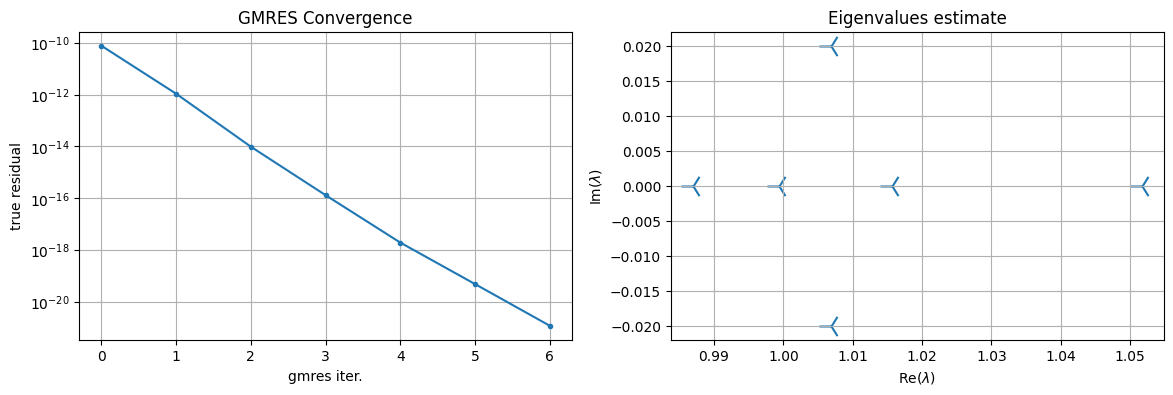

In [ ]:
sol = None
schema = model._prepare_solver()
_ = solve_petsc_new(
    model.bmat,
    schema,
    rhs_global=rhs,
    # Qleft=model.Qleft,
    Qright=model.Qright,
    pc_side="right",
    tol=1e-10,
)

In [ ]:
J = model.bmat.copy()
J.mat = J.mat @ model._Qright.mat
J.shape

(2964, 2964)

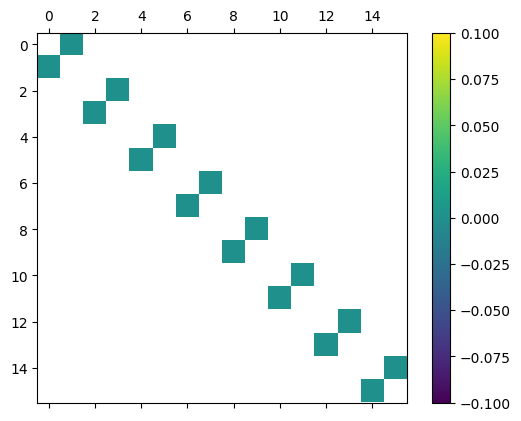

In [ ]:
J[[4]].matshow()

In [ ]:
J4 = J[[4]].mat
cond(inv_block_diag(J4, nd=model.nd) @ J4)

1.0

Has negative lambda


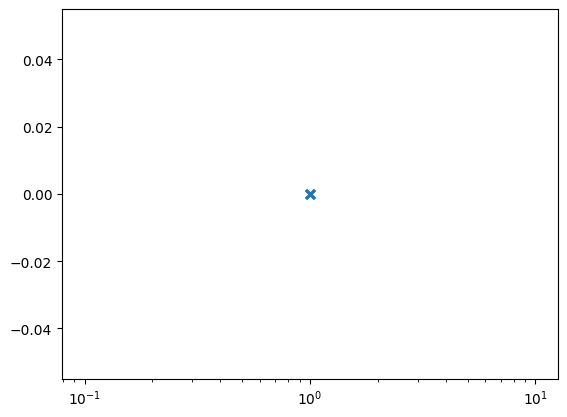

In [ ]:
plot_eigs_exact(J[[4]].mat)

In [ ]:
keep = [0, 1, 2, 3, 5]
elim = [4]
S1 = J[keep, keep].empty_container()
S1.mat = J[keep, keep].mat - J[keep, elim].mat @ inv_block_diag(J[[4]].mat, nd=model.nd) @ J[elim, keep].mat

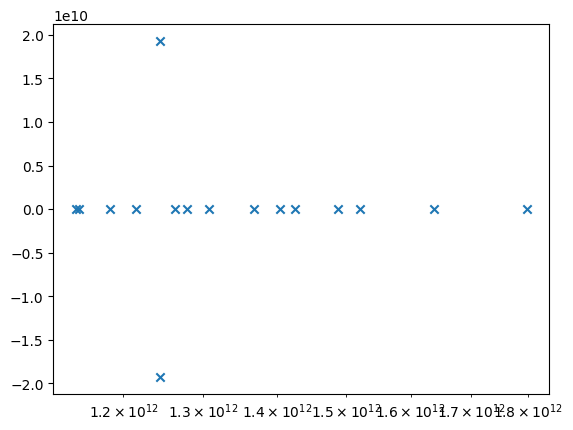

In [ ]:
plot_eigs_exact(S1[[3]].mat)

In [ ]:
keep = [0, 1, 2, 5]
elim = [3]
S2 = S1[keep, keep].empty_container()
S2.mat = S1[keep, keep].mat - S1[keep, elim].mat @ inv_block_diag(S1[[3]].mat, nd=1) @ S1[elim, keep].mat

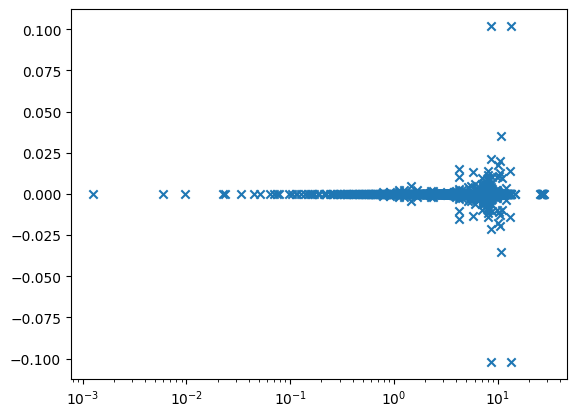

In [ ]:
mech = [1, 5]
plot_eigs_exact(S2[mech].mat)

Alternative mechanics elimination

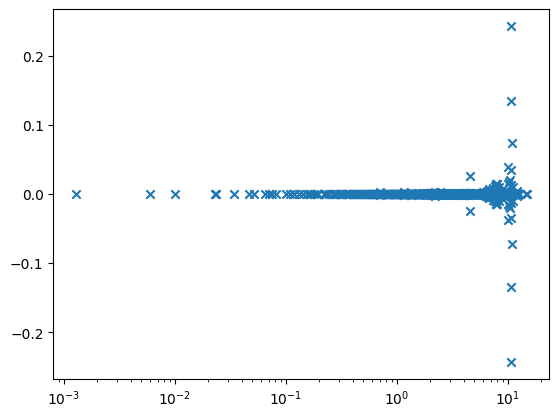

In [ ]:
keep = [1]
elim = [5]
J1 = S1[keep].empty_container()
J1.mat = S1[keep, keep].mat - S1[keep, elim].mat @ inv(S1[elim].mat) @ S1[elim, keep].mat
plot_eigs_exact(J1[keep].mat)

In [ ]:
keep = [0, 2]
elim = [1, 5]
S3 = S2[keep, keep].empty_container()
S3.mat = S2[keep, keep].mat + make_fs_experimental(model, J).mat

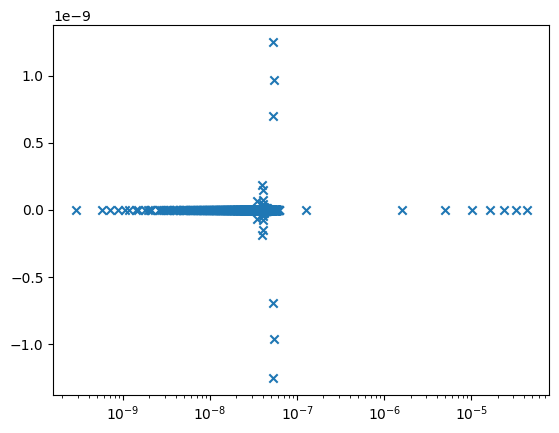

In [ ]:
flow = [0, 2]
plot_eigs_exact(S3[flow].mat)